In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
import madjax
import numpy as np
import jax
import matplotlib.pyplot as plt


E_cm = 91.1876


def func1(E_cm):
    mZ = 91.1876
    gamZ = 2.4952

    s = E_cm**2
    r = (
        12
        * np.pi
        / mZ**2
        * s
        / ((s - mZ**2) ** 2 + mZ**2 * gamZ**2)
        * 0.0839
        * 0.0839
    )
    #     return r / 2.56819 / 1000 * 1e9
    return r


def func2(E_cm):
    mZ = 91.1876
    gamZ = 2.4952
    alpha = 1 / 132.5070
    s = E_cm**2
    I3W = -1 / 2
    Q = -1
    sinT2w = 0.22224649
    cV = I3W - 2 * Q * sinT2w
    cA = I3W

    sinTw = np.sqrt(sinT2w)
    cosTw = np.sqrt(1 - sinT2w)

    e = np.sqrt(4 * np.pi * alpha)

    gZ = e / (sinTw * cosTw)

    #     print(gZ**2*mZ/(48*np.pi)*(cV**2 + cA**2))

    return (
        1
        / (192 * np.pi)
        * gZ**4
        * s
        / ((s - mZ**2) ** 2 + mZ**2 * gamZ**2)
        * (cV**2 + cA**2)
        * (cV**2 + cA**2)
    )


def get_constants(E_cm):
    mZ = 91.1876
    gamZ = 2.4952
    alpha = 1 / 132.5070
    s = E_cm**2
    I3W = -1 / 2
    Q = -1
    sinT2w = 0.22224649
    cV = I3W - 2 * Q * sinT2w
    cA = I3W

    sinTw = np.sqrt(sinT2w)
    cosTw = np.sqrt(1 - sinT2w)

    e = np.sqrt(4 * np.pi * alpha)

    gZ = e / (sinTw * cosTw)

    pre = (
        1
        / (64 * np.pi**2)
        * 1
        / 4
        * gZ**4
        * s
        / ((s - mZ**2) ** 2 + mZ**2 * gamZ**2)
    )
    prop2 = 2 * cV**2 * cA**2
    prop1 = 1 / 4 * (cV**2 + cA**2) * (cV**2 + cA**2)
    return pre, prop1, prop2


def func3(E_cm, cosTheta):
    pre, prop1, prop2 = get_constants(E_cm)

    r = pre * (prop1 * (1 + cosTheta**2) + prop2 * cosTheta)
    return r


mj = madjax.MadJax('ee_to_mumu')


def func_from_madjax(E_cm, x):
    matrix_element = mj.matrix_element(E_cm=E_cm, process_name='Matrix_1_mupmum_epem')
    jacobian = mj.jacobian(E_cm=E_cm, process_name='Matrix_1_mupmum_epem')
    m = matrix_element({}, [x, 0.0])[0]
    j = jacobian({}, [x, 0.0])
    return m * j * 1.1542082055734027e-07


get_constants(E_cm)

(1.913541430890075e-05, 0.01601250184399959, 0.001540514634640201)

In [68]:
import vegas

integ = vegas.Integrator([[-1, 1]])
integ(lambda x: func3(E_cm, x)) * 2 * np.pi

RAvgArray([5.13369(12)e-06], dtype=object)

In [69]:
?integ

In [48]:
func_from_madjax(90, 0)

DeviceArray(3.3017639e-07, dtype=float64)

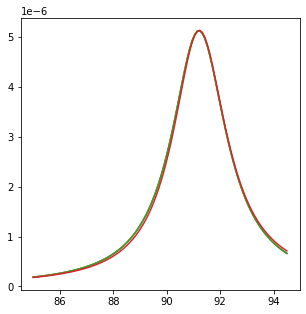

In [56]:
cms = np.linspace(85, 94.5, 100)
plt.plot(cms, [func1(x) for x in cms])
plt.plot(cms, [func2(x) for x in cms])
plt.plot(cms, [func3(x, 0) * 8 / 3 * 2 * np.pi for x in cms])
plt.plot(cms, [func_from_madjax(x, 0.5) * 8 / 3 * 2 * np.pi for x in cms])
plt.gcf().set_size_inches(5, 5)

In [45]:
print(func1(E_cm))
print(func2(E_cm))
print(func3(E_cm, 0) * 8 / 3 * 2 * np.pi)
print(func_from_madjax(E_cm, 0.5) * 8 / 3 * 2 * np.pi)

5.125930882358799e-06
5.133879408404376e-06
5.133879408404376e-06
44.47966479196793


In [53]:
5.133879408404376e-06 / 44.47966479196793 / E_cm**2

1.3880738944092417e-11